In [1]:
import yaml
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set seaborn plot style (nicer than matplotlib)
sns.set_style()

### Exploratory analysis of income data

In [3]:
# create engine
with open('/data/users/carlyjon/secrets.yaml', 'r') as f:
    secrets = yaml.safe_load(f)
    db_params = secrets
    engine = create_engine('postgres://{user}:{password}@{host}:{port}/{dbname}'.format(
        host=db_params['host'],
        port=db_params['port'],
        dbname=db_params['dbname'],
        user=db_params['user'],
        password=db_params['password']
    ))

In [4]:
# create sql template for pulling bias data
template = """
select * from carly_schema.bias_data
"""

In [5]:
# pull bias data into dataframe
bias_df = pd.read_sql(template, engine)

In [6]:
# inspect nulls
nulls = bias_df[bias_df['est_total_income'].isnull() == True]
nulls

,handler_id,zipcode,est_total_income


<AxesSubplot:xlabel='est_total_income', ylabel='Count'>

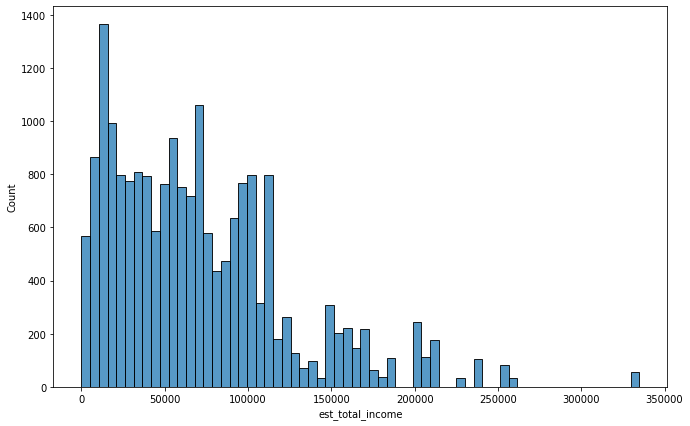

In [7]:
# plot distribution of estimated total household income (per handler, by zipcode)
fig, ax = plt.subplots(figsize=(11,7))
sns.histplot(data=bias_df['est_total_income'])

In [8]:
# print summary stats for estimated household income (per handler, by zipcode)
bias_df['est_total_income'].describe()

count     19515.000000
mean      71006.945478
std       54453.911702
min           0.000000
25%       28535.000000
50%       62493.000000
75%       99072.000000
max      334885.000000
Name: est_total_income, dtype: float64

### Bias and fairness analysis for top models

In [9]:
# load data
# with history
bias_wHist_1v2 = pd.read_csv('/data/groups/epa1/mlpolicylab_fall20_epa1/Pipeline/experiments/grid_import_201209_0315_with_history_final_grid/bias_fairness_top21%_income_category_1_vs_2.csv')

# without history
bias_woHist_1v2 = pd.read_csv('/data/groups/epa1/mlpolicylab_fall20_epa1/Pipeline/experiments/grid_import_201209_2127_without_history_final_grid/bias_fairness_top21%_income_category_1_vs_2.csv')

In [10]:
# create model number column for sorting, sort, and change labeled k to integer type
# with history
bias_wHist_1v2['model_num'] = bias_wHist_1v2['model_name'].str.split('_').str[1].astype(int)
bias_wHist_1v2 = bias_wHist_1v2.sort_values('model_num')
bias_wHist_1v2['num_labeled_k'] = bias_wHist_1v2['num_labeled_k'].astype(int)

# without history
bias_woHist_1v2['model_num'] = bias_woHist_1v2['model_name'].str.split('_').str[1].astype(int)
bias_woHist_1v2 = bias_woHist_1v2.sort_values('model_num')
bias_woHist_1v2['num_labeled_k'] = bias_woHist_1v2['num_labeled_k'].astype(int)

#### Recall disparity, with history

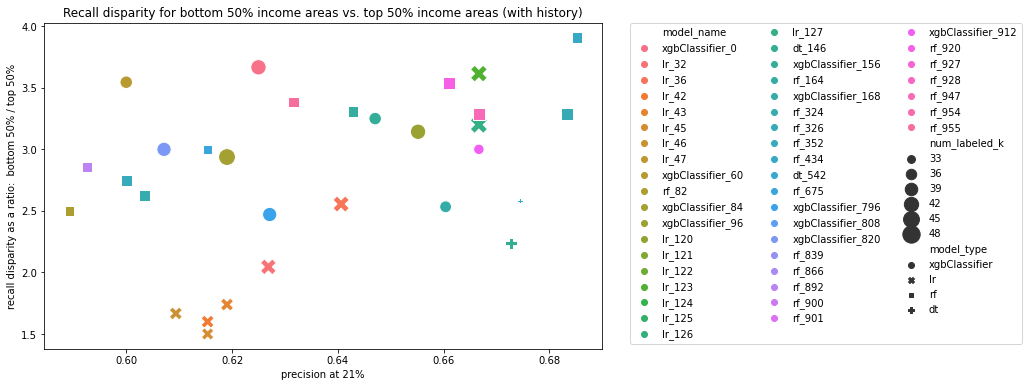

In [15]:
# scatter recall disparity
# with history
# categories 1 vs 2
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Recall disparity for bottom 50% income areas vs. top 50% income areas (with history)')
# ax.set_ylim()
# ax.set_xlim()
ax.set_ylabel('recall disparity as a ratio:  bottom 50% / top 50%')
ax.set_xlabel('precision at 21%')
sns.scatterplot(x='precision_k', y='recall_disparity', hue='model_name', size='num_labeled_k', style='model_type', data=bias_wHist_1v2, sizes=(30,300))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3,fontsize=10)

#### False discovery rate, with history

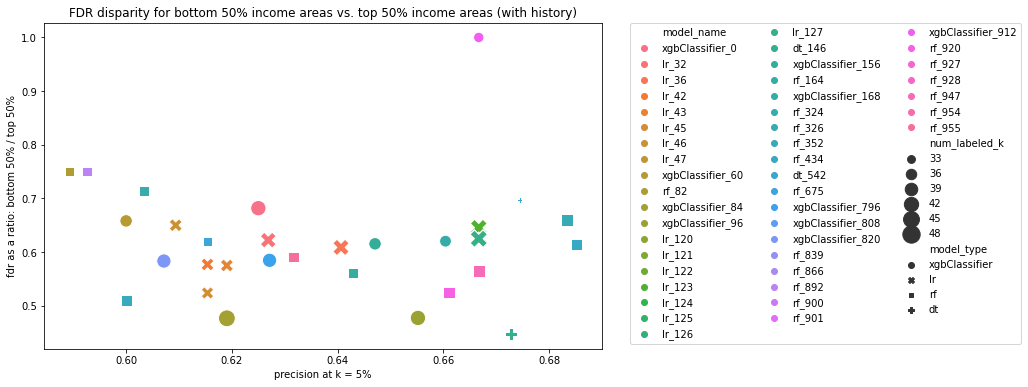

In [12]:
# scatter fdr
# with history
# categories 1 vs 2
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('FDR disparity for bottom 50% income areas vs. top 50% income areas (with history)')
# ax.set_ylim()
# ax.set_xlim()
ax.set_ylabel('fdr as a ratio: bottom 50% / top 50%')
ax.set_xlabel('precision at k = 5%')
sns.scatterplot(x='precision_k', y='fdr_ratio', hue='model_name', size='num_labeled_k', style='model_type', data=bias_wHist_1v2, sizes=(30,300))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3,fontsize=10)

#### Recall disparity, without history

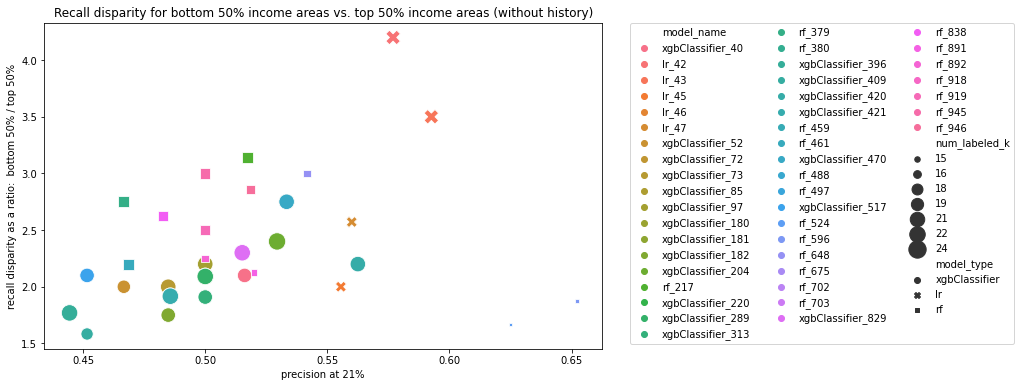

In [16]:
# scatter recall disparity
# without history
# categories 1 vs 2
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Recall disparity for bottom 50% income areas vs. top 50% income areas (without history)')
# ax.set_ylim()
# ax.set_xlim()
ax.set_ylabel('recall disparity as a ratio:  bottom 50% / top 50%')
ax.set_xlabel('precision at 21%')
sns.scatterplot(x='precision_k', y='recall_disparity', hue='model_name', size='num_labeled_k', style='model_type', data=bias_woHist_1v2, sizes=(30,300))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3,fontsize=10)

#### False discovery rate, without history

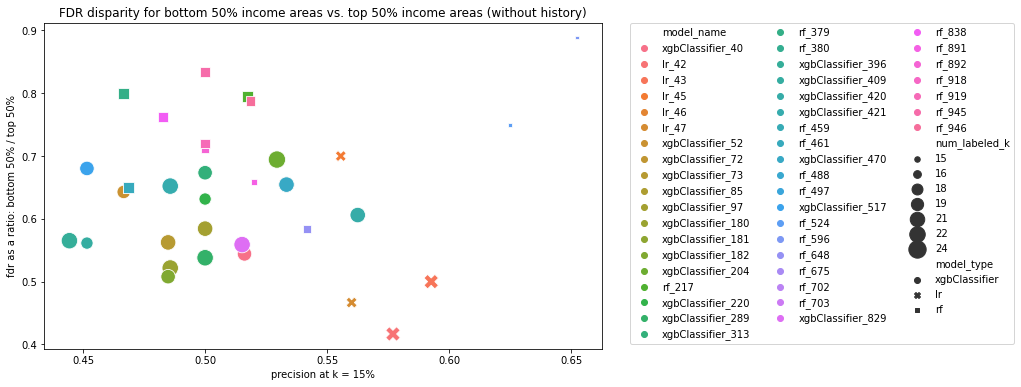

In [14]:
# scatter fdr
# without history
# categories 1 vs 2
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('FDR disparity for bottom 50% income areas vs. top 50% income areas (without history)')
# ax.set_ylim()
# ax.set_xlim()
ax.set_ylabel('fdr as a ratio: bottom 50% / top 50%')
ax.set_xlabel('precision at k = 15%')
sns.scatterplot(x='precision_k', y='fdr_ratio', hue='model_name', size='num_labeled_k', style='model_type', data=bias_woHist_1v2, sizes=(30,300))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3,fontsize=10)